In [185]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors

%matplotlib inline

In [222]:
df = pd.read_csv("data2.csv")

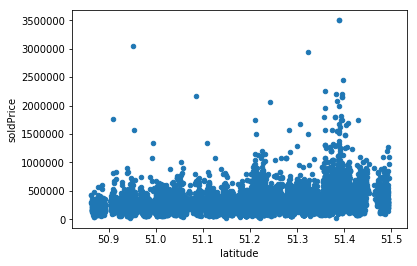

In [223]:
df.plot.scatter(x="latitude", y="soldPrice")

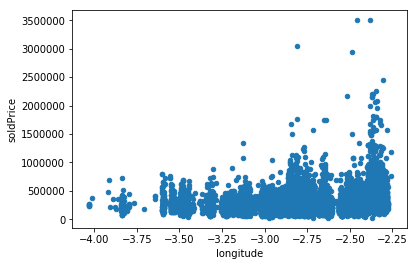

In [224]:
df.plot.scatter(x="longitude", y="soldPrice")

In [231]:
lat_lon_price = df.groupby(["longitude", "latitude"])["soldPrice"].mean()

lat_lon_price = lat_lon_price.sort_values()
lats = [x[0] for x in lat_lon_price.index]
lons = [y[1] for y in lat_lon_price.index]
prices = lat_lon_price.values
max_v = lat_lon_price.values.max()
min_v = lat_lon_price.values.min()

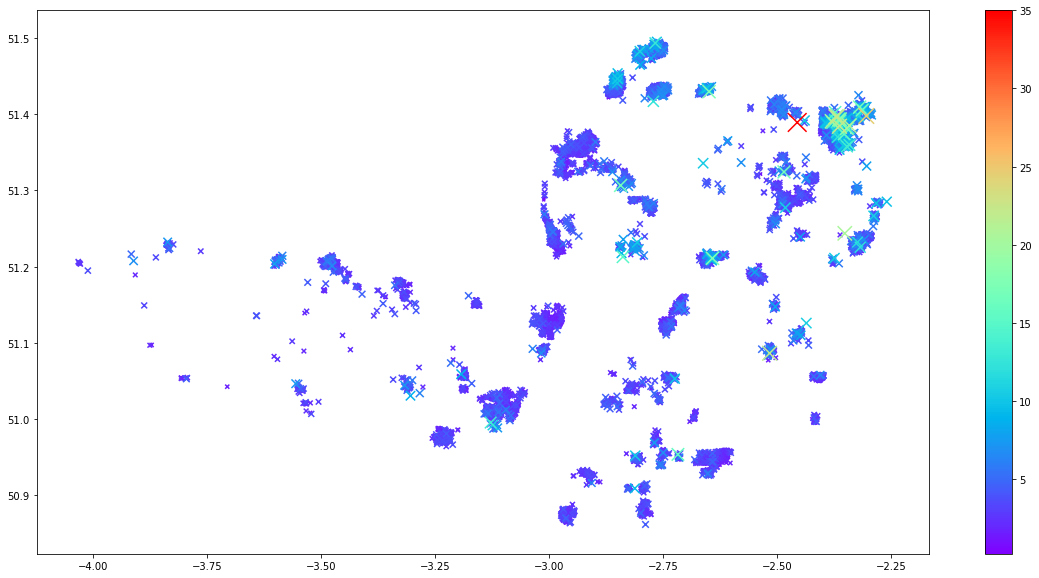

In [232]:
cmap = plt.cm.rainbow
norm = matplotlib.colors.Normalize(vmin=min_v/100000, vmax=max_v/100000)

fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(x=lats, y=lons, color=cmap(norm(prices/100000)), s=(prices/100000)*10, marker="x")

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # only needed for matplotlib < 3.1
fig.colorbar(sm)

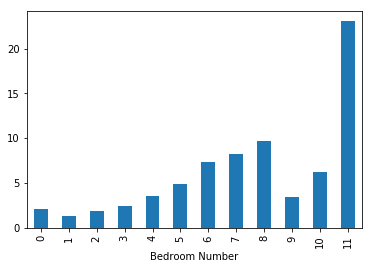

In [227]:
ax_bar = (df.groupby("bednumber")["soldPrice"].mean() / 100000).plot.bar()
ax_bar.set_xlabel("Bedroom Number")
ax_bar

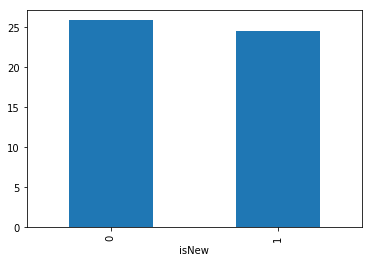

In [228]:
(df.groupby("isNew")["soldPrice"].mean() / 10000).plot.bar()

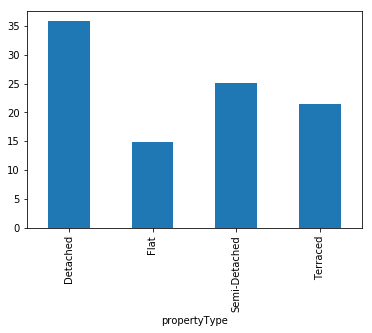

In [229]:
(df.groupby("propertyType")["soldPrice"].mean() / 10000).plot.bar()

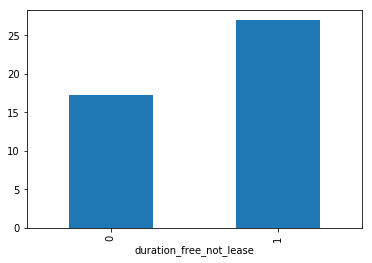

In [230]:
(df.groupby("duration_free_not_lease")["soldPrice"].mean() / 10000).plot.bar()